In [4]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [23]:

import pandas as pd
import numpy as np
from numpy import where
import csv

import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import plotly.offline as pyo
from collections import Counter


from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings(action='ignore')
from tabulate import tabulate

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier ,ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from IPython.display import Image

In [20]:
import time

from google.colab import files
uploaded = files.upload()

In [6]:
data = pd.read_csv('second.csv')
data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,formerly smoked,never smoked,smokes,work_Govt_job,work_Never_worked,work_Private,work_Self-employed,work_children
0,0,3,0,0,0,0,95,18,0,0,1,0,0,0,0,0,1
1,0,58,1,0,1,1,87,39,0,0,1,0,0,0,1,0,0
2,1,8,0,0,1,1,110,17,0,0,1,0,0,0,1,0,0
3,1,70,0,0,0,0,69,35,0,1,0,0,0,0,1,0,0
4,1,52,0,0,1,1,77,17,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34607,1,10,0,0,1,1,58,20,0,0,1,0,0,0,0,0,1
34608,1,56,0,0,1,1,213,55,0,1,0,0,1,0,0,0,0
34609,1,82,1,0,1,1,91,28,0,1,0,0,0,0,1,0,0
34610,0,40,0,0,1,1,99,33,0,0,1,0,0,0,1,0,0


## Train-Test Split

In [7]:
y = data['stroke']
X = data.drop('stroke', axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [9]:
y_test

17561    0
30884    0
251      0
30728    0
22327    0
        ..
22524    0
5511     0
26349    0
1266     0
33675    0
Name: stroke, Length: 6923, dtype: int64

**Random_state** – это параметр, который позволяет установить начальные условия для генерации случайных чисел. Он используется для получения повторяемых результатов в тех случаях, когда необходимо произвести несколько экспериментов с одним и тем же набором данных. При этом может быть установлено любое исходное значение для данного параметра.

Суть параметра **random_state** (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях. Т.е. если явно задать значение random_state отличным от None - то генерируемые псевдослучайные величины будут иметь одни и те же значения при каждом вызове.

In [10]:
#counter = y_train.value_counts()
#counter
# summarize class distribution
cou = Counter(y_train)
cou

Counter({0: 27187, 1: 502})

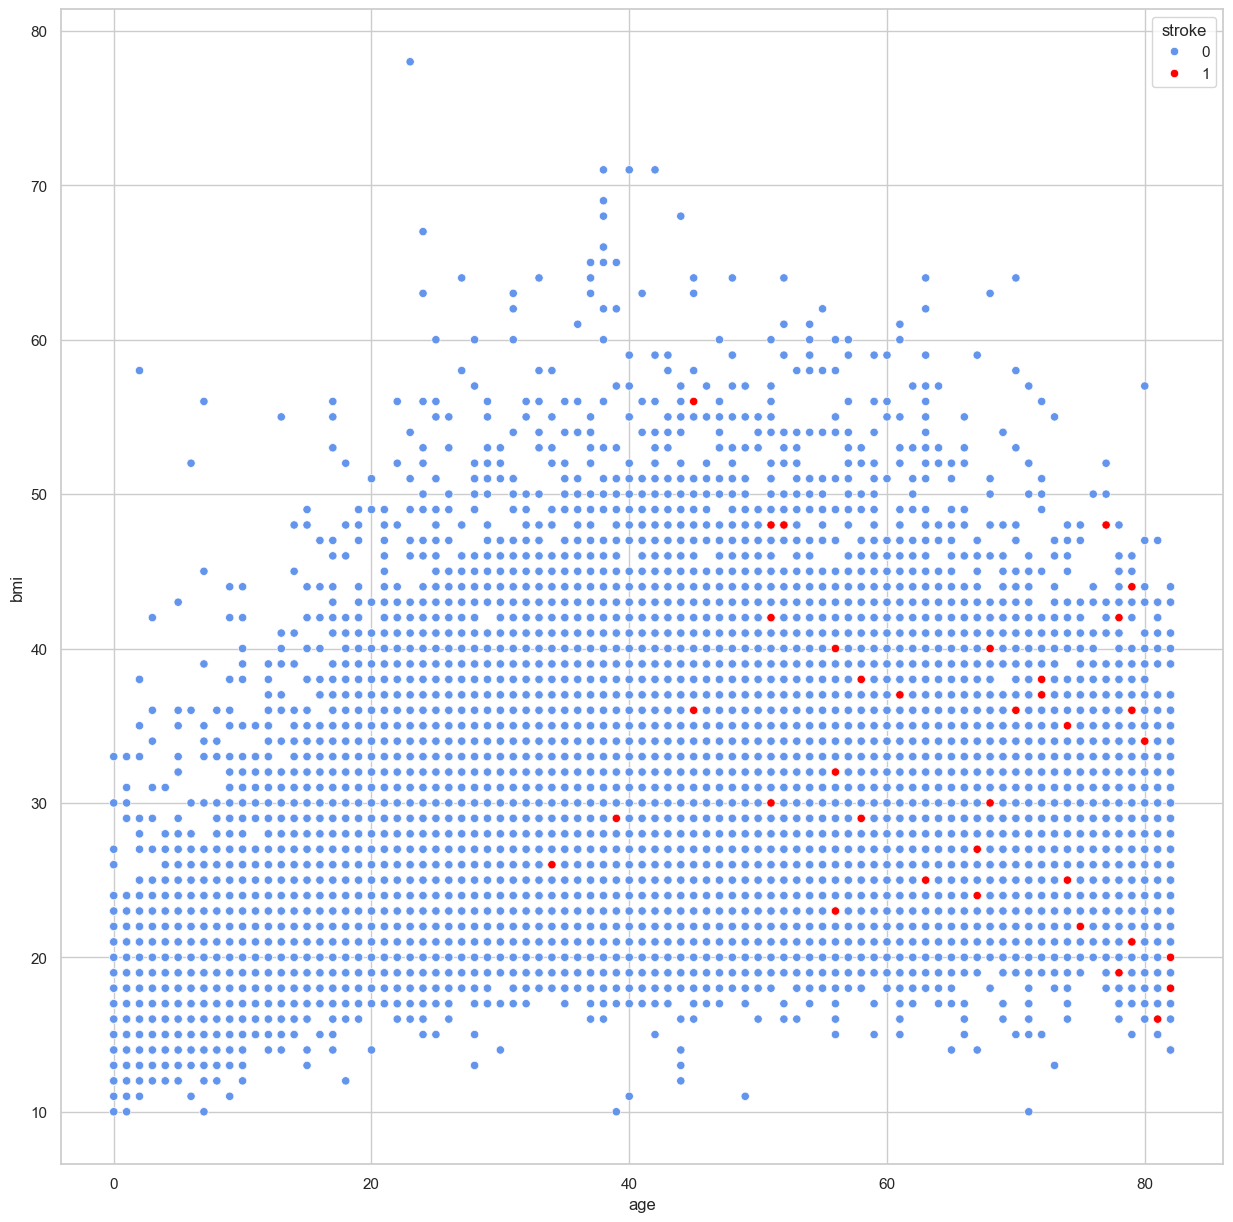

In [11]:
plt.figure(figsize=(15, 15))  # Set the figure size (width, height) in inches

sns.scatterplot(x=X_train['age'], y=X_train['bmi'], hue=y_train, palette=['cornflowerblue', 'red'])

plt.show()  # Show the plot

In [ ]:
sns.countplot(x=y_train, data=X_train)
plt.title("Количество пациентов без инсульта & с инсультом. Несбалансированные данные")
plt.show()

## Feature Scaling

возможно, потребуется масштабировать(стандартизация или нормализация) перед использованием в методах машинного обучения,особенно для  таких как линейная регрессия, логистическая регрессия, нейронные сети, которые используют градиентный спуск в качестве стратегии оптимизации.
Изменение масштаба данных может осуществляться двумя способами: стандартизацией и нормализацией.
Техника масштабирования**: нормализац**ия изменяет масштаб данных так, чтобы данные находились в диапазоне от 0 до 1 (масштабирование Min-Max
).
Набор данных масштабируется посредств**ом стандартиза**ции, имеет среднее значение = 0 и стандартное отклонение = 1.                            std_per_feature =X_train.std()
print(std_per_feature)


***Масштабирование или стандартизация данных***. Это этап предварительной обработки данных, который применяется к независимым переменным или функциям данных. Это в основном помогает нормализовать данные в определенном диапазоне. Иногда это также помогает ускорить вычисления в алгоритме.
Каждый метод масштабирования имеет свои преимущества и ограничения, и не существует метода, подходящего для любой ситуации. Нам следует понять каждый метод, реализовать его и посмотреть, какой из них лучше всего подходит для конкретной проблемы.

***StandardScaler()*** преобразует данные таким образом, что их распределение будет иметь среднее значение 0 и стандартное отклонение 1. Это делается путем вычитания среднего значения каждого признака и деления на его стандартное отклонение.

Применение StandardScaler() помогает алгоритмам машинного обучения работать лучше, особенно если у признаков разные диапазоны значений. Масштабирование признаков позволяет моделям лучше справляться с данными, так как оно делает их более сопоставимыми и улучшает сходимость алгоритмов.

In [12]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)



In [13]:
X_train_sc

array([[-1.21627131,  0.34012719, -0.33380798, ..., -1.14157529,
         2.31284064, -0.41851513],
       [-1.21627131, -0.70996345, -0.33380798, ...,  0.87598252,
        -0.43236874, -0.41851513],
       [ 0.82218498,  1.69649426, -0.33380798, ...,  0.87598252,
        -0.43236874, -0.41851513],
       ...,
       [ 0.82218498, -0.49119457, -0.33380798, ...,  0.87598252,
        -0.43236874, -0.41851513],
       [-1.21627131,  0.07760453, -0.33380798, ..., -1.14157529,
        -0.43236874, -0.41851513],
       [ 0.82218498,  0.73391118, -0.33380798, ..., -1.14157529,
        -0.43236874, -0.41851513]])

In [14]:
std_per_feature = X_train_sc.std()
print(std_per_feature)

1.0


In [15]:
mean_per_feature = X_train_sc.mean()
print(mean_per_feature)

-1.1627891117096877e-18


In [16]:
len(X_train_sc)

27689

# Handling Imbalance data using SMOTE

***книга brownlee_jason_imbalanced_classification_with_python_better***

Основные шаги метода SMOTE:


# 1. Выборка примеров: Выбираются примеры(точки) из меньшего класса.

# 2. Выбор ближайших соседей: Для каждого выбранного примера(точки) находятся его ближайшие соседи в пространстве.
Для нахождения ближайших соседей в пространстве признаков используют различные методы, наиболее распространенным из которых является метод k-        ближайших соседей (k-NN, k-nearest neighbors).
В библиотеке imbalanced-learn для метода SMOTE (Synthetic Minority Over-sampling Technique) используется ближайший метод соседей (k-NN) для нахождения ближайших соседей и генерации синтетических примеров.

# 3. Выбор метрики: Сначала определяется метрика расстояния, такая как евклидово расстояние, манхэттенское расстояние или косинусное расстояние. Она определяет, как измеряется расстояние между двумя точками.

Какая конкретно метрика используется по умолчанию внутри k-NN в imbalanced-learn, зависит от реализации. В большинстве случаев для SMOTE по умолчанию используется евклидова метрика (euclidean distance), так как это одна из наиболее распространенных метрик расстояния для метода ближайших соседей.

Однако в imbalanced-learn вы можете явно указать метрику, используя параметр k_neighbors при создании экземпляра класса MTE

# Создание экземпляра SMOTE с указанием метрики (например, манхэттенское расстояи


е)
smote = SMOTE(k_neighbors=5, metric='manhatор:

pythonных.анных.




e)
)E.

# 4. Определение числа соседей (k): Это количество ближайших соседей, которые будут использоваться для создания синтетических примеров. Обычно выбирается заранее, и это важный гиперпараметр алгоритма. По умолчанию в SMOTE k=5.

Для установки числа соседей (k) при использовании метода SMOTE без конкретной модели вы можете сделать это с помощью класса SMOTE из библиотеки imbalanced-learn, указав параметр k_neighbors при создании экземпляра SMOTE**

Установка значения числа соседей (k) для SMOTE
k_neighbors_value = 5

**Пример значения k**

k_neighbors_value = 5
smote = SMOTE(k_neighbors=k_neighbor)


Установка значения этого параметра может влиять на баланс между качеством сгенерированных данных и временем вычислений.

Установка значения числа соседей (k) в SMOTE через параметр k_neighbors позволит определить, сколько ближайших соседей будет использоваться при генерации синтетических примеров для классов-меньшинств.

Однако, конкретное количество сгенерированных примеров в методе SMOTE не привязано напрямую к значению k_neighbors. Количество сгенерированных примеров зависит от особенностей данных и их распределения. k_neighbors влияет на процесс генерации, но не устанавливает точное число синтетических примеров.

Например, если в данных есть определенное количество примеров в классе-меньшинстве, SMOTE с параметром k_neighbors=5 будет использовать 5 ближайших соседей для генерации новых примеров, но количество сгенерированных примеров будет зависеть от размера этого класса и его отношения с классом-большинством после применения SMOTE.

Для конкретного числа сгенерированных примеров необходимо оценивать результаты после применения SMOTE к вашим данным. SMOTE стремится сбалансировать классы, но точное количество сгенерированных примеров может варьироваться в зависимости от их распределения и структуры д

В библиотеке imbalanced-learn метод SMOTE имеет параметр sampling_strategy, который по умолчанию устанавливается на 'auto'. Этот параметр контролирует балансировку классов путем установки соотношения между числом примеров в классе-меньшинстве и числом примеров в классе-большинстве после применения SMOTE.

Когда:

sampling_strategy='auto'

SMOTE автоматически устанавливает количество сгенерированных примеров для класса-меньшинства таким образом, чтобы соотношение классов после применения оверсэмплинга было примерно одинаковым. Это означает, что количество сгенерированных примеров будет зависеть от соотношения классов в исходных данных.

Точное количество сгенерированных примеров в классе-меньшинстве в SMOTE не устанавливается явно. Оно зависит от конкретных данных и отношения между классами в вашем наборе данных. SMOTE стремится к балансу между классами, но фактическое количество созданных примеров может различаться в зависимости от распределения классов и структуры да

Параметр sampling_strategy в методе SMOTE в библиотеке imbalanced-learn представляет собой способ установки соотношения между классами после применения оверсэмплинга. Этот параметр может принимать различные значения для определения желаемого баланса классов после применения SMOTE.

Вот несколько возможных способов установки sampling_strategy:

Строковые значения:

'auto' (по умолчанию): SMOTE автоматически определяет количество сгенерированных примеров так, чтобы соотношение классов после оверсэмплинга было примерно одинаковым.

'minority': Количество сгенерированных примеров будет таким, чтобы число примеров в классе-меньшинстве стало равным числу примеров в классе-большинстве.


Словарь: Вы можете явно указать желаемое соотношение между классами, используя словарь, где ключи - это метки классов, а значения - это количество сгенерированных примеров.

Установка соотношения между классами:

sampling_strategy = {0: 1000, 1: 500} # Например, генерируем 1000 примеров для класса 0 и 500 примеров для класса 1

smote = SMOTE(samplin# g_strategy=sampling_strate

# 5. Нахождение ближайших соседей:
Для каждого примера из миноритарного класса вычисляются расстояния до всех других примеров в пространстве признаков с использованием выбранной метрики.
Затем выбираются k ближших соседей этого примера.

# 6. Использование ближайших соседей для генерации синтетических данных:
После того как ближайшие соседи определены, для каждого примера из миноритарного класса генерируются синтетические примеры путем комбинирования признаков выбранного примера с признаками его ближайших соседей


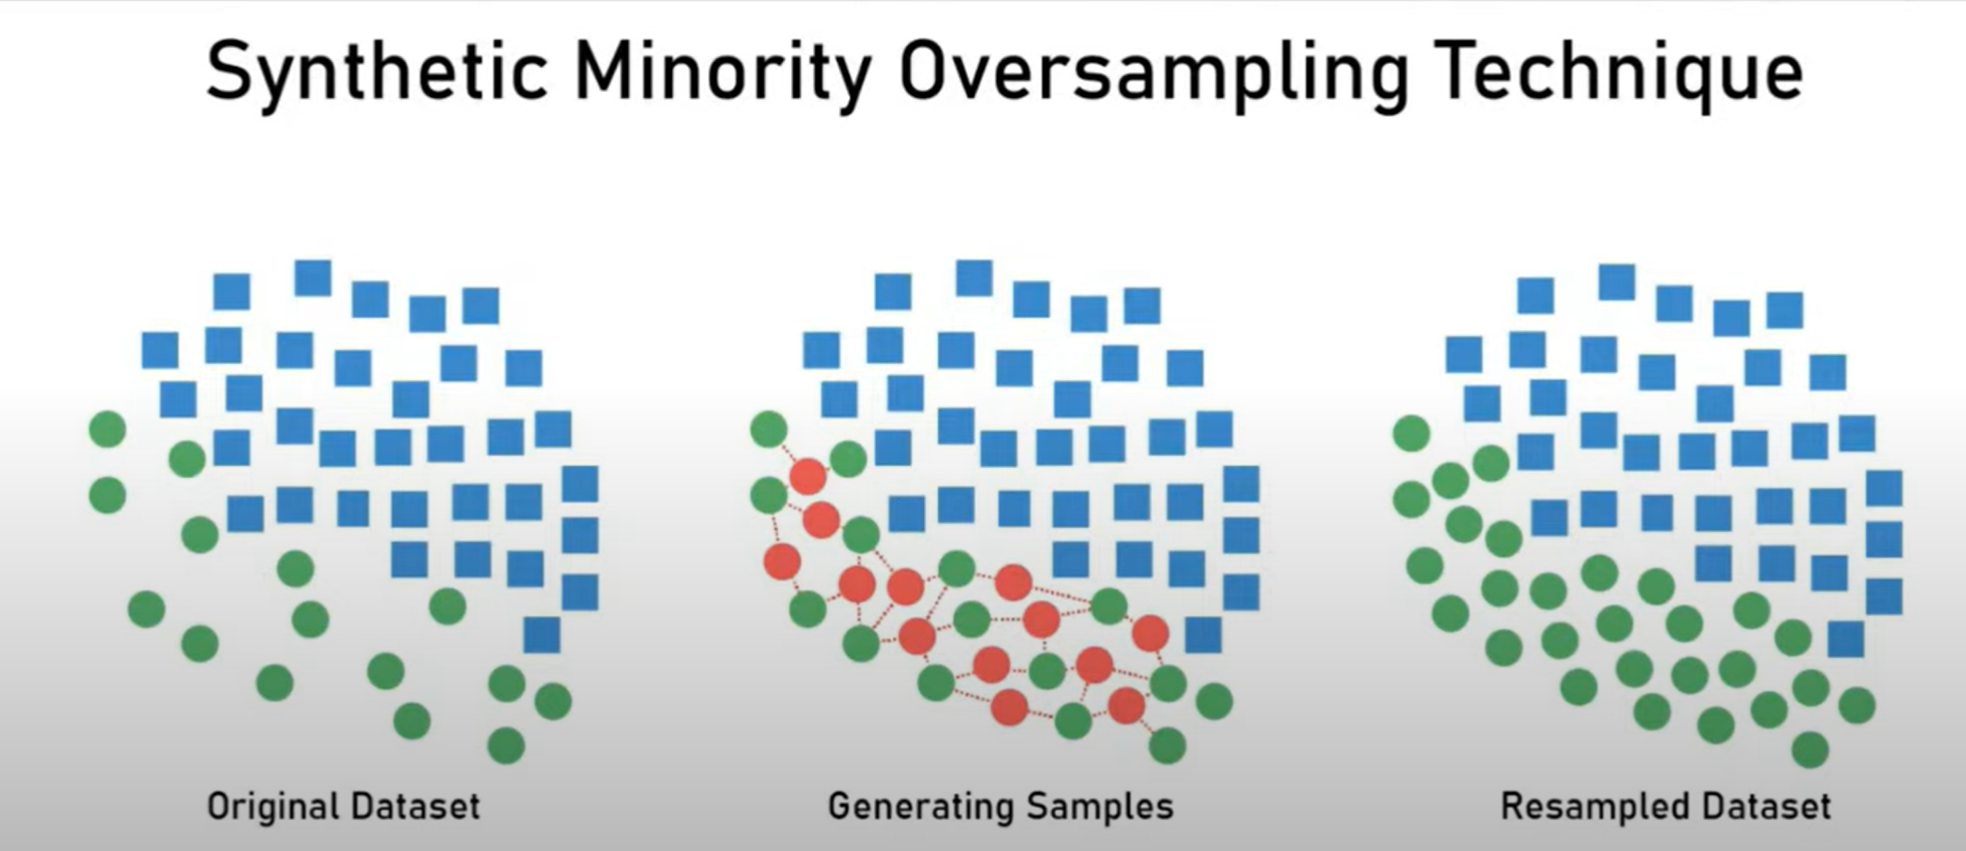

In [ ]:
Image(filename='SMOTE.png')

In [17]:

print("Before Smote, counts of label '1': {}".format(sum(y_train==1)))
print("Before Smote, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42)
#Функция ravel() в библиотеке NumPy используется для преобразования многомерного массива в одномерный массив.
#Она возвращает новый одномерный массив, содержащий те же элементы, что и исходный массив, но расположенные в одномерной последовательности.
X_train_smote, y_train_smote = sm.fit_resample(X_train_sc, y_train.ravel()) # Skailing (здесь мы применяем масштабированные данные)

print('After Smote, the shape of train_X: {}'.format(X_train_smote.shape))
print('After Smote, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After Smote, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After Smote, counts of label '0': {}".format(sum(y_train_smote==0)))

Before Smote, counts of label '1': 502
Before Smote, counts of label '0': 27187 

After Smote, the shape of train_X: (54374, 16)
After Smote, the shape of train_y: (54374,) 

After Smote, counts of label '1': 27187
After Smote, counts of label '0': 27187


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('Before and after SMOTE')
sns.countplot(ax=ax[0], x=y_train, palette=["#bff2d9", "#fc4c84"])
ax[0].set_title("before")

sns.countplot(ax=ax[1], x=y_train_smote, palette=["#bff2d9", "#fc4c84"])
ax[1].set_title('after')

fig.show()

In [ ]:
#!!!График строится только на немасштабированных данных (бокс[35]:X_train_sc -> X_train)!!!
# Filtering the data for the specified age range

age_range_mask = (X_train['age'] >= 20) & (X_train['age'] <= 60)
#filtered_X_train = X_train[age_range_mask]
#filtered_y_train = y_train[age_range_mask]
filtered_X_train = X_train.loc[age_range_mask]
filtered_y_train = y_train.loc[age_range_mask]

age_range_mask_smote = (X_train_smote['age'] >= 20) & (X_train_smote['age'] <= 60)
filtered_X_train_smote = X_train_smote[age_range_mask_smote]
filtered_y_train_smote = y_train_smote[age_range_mask_smote]

# Creating the scatter plot for the filtered data
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
sns.set_style("whitegrid")

# Plot 1: Scatter plot for the original data
sns.scatterplot(x=filtered_X_train['age'], y=filtered_X_train['bmi'], hue=filtered_y_train, palette=['cornflowerblue', 'red'], ax=axes[0])
axes[0].set_title('Scatter plot of age (20-60) vs. BMI by stroke')

# Plot 2: Scatter plot for the SMOTE data
sns.scatterplot(x=filtered_X_train_smote['age'], y=filtered_X_train_smote['bmi'], hue=filtered_y_train_smote, palette=['cornflowerblue', 'red'], ax=axes[1])
axes[1].set_title('Scatter plot of age (20-60) vs. BMI (SMOTE) by stroke')

plt.show()

In [ ]:
#!!!График строится только на немасштабированных данных (бокс[35]:X_train_sc -> X_train)!!!
plt.figure(figsize=(15, 15))  # Set the figure size (width, height) in inches

sns.scatterplot(x=X_train_smote['age'], y=X_train_smote['bmi'], hue=y_train_smote, palette=['cornflowerblue', 'red']) #Охватывает полный разброс по возрасту и индексу массы тела

plt.show()  # Show the plot

***Методы машинного обучения*** часто терпят неудачу или дают обманчиво оптимистичные результаты при работе с наборами  данных по классификации с несбалансированным распределением классов. Причина в том, что многие алгоритмы машинного обучения предназначены для работы с данными  с одинаковым количеством наблюдений для каждого класса. Если это не так, алгоритмы могут предполагать , что очень небольшое количество информации в меньшем классе не важны, и их можно игнорировать, чтобы добиться хорошей производительности.
Data sampling представляет собой набор методов, которые преобразуют набор обучающих данных в сбалансированные.


Существует множество различных типов методов ***"Data sampling"***, которые можно использовать, но не существует единого лучшего метода, который можно было бы использовать для всех задач классификации и для всех моделей классификации. Как и при выборе  модели для прогнозирования , необходимо тщательное экспериментирование, чтобы определить, что лучше всего подходит для вашего проекта.

Методы передискретизации **"Оversampling Techniques"**
Методы передискретизации дублируют примеры из класса меньшинства или синтезируют новые примеры из примеров из класса меньшинства. Некоторые из наиболее широко используемых и реализованных методов передискретизации включают:
Случайная передискретизация "Random Oversampling"

##  Random Oversampling
Random Oversampling увеличивает количество образцов в минорном классе, создавая дополнительные копии существующих образцов этого класса. Процесс заключается в нескольких шагах:

Выбор образцов: Сначала метод идентифицирует минорный класс, в котором наблюдается дисбаланс. Затем из этого класса случайным образом выбираются образцы, которые будут скопированы.

Копирование образцов: Выбранные образцы из минорного класса копируются, чтобы увеличить количество представителей этого класса в данных. Новые копии добавляются в исходный датасет.

Балансировка классов: Процесс повторяется до тех пор, пока соотношение между классами не станет более сбалансированным или пока не будет достигнуто желаемое соотношение между кла

Установка желаемого соотношения между классами при использовании метода Random Oversampling зависит от конкретной задачи и желаемого уровня баланса классов в данных.

Если вы хотите установить конкретное соотношение между классами, вам нужно решить, какое именно соотношение вам требуется. Например, вы можете хотеть сбалансировать классы так, чтобы количество образцов в минорном классе было равно количеству образцов в мажорном классе, или установить другое желаемое отношение.

ссами.
книга: brownlee_jason_imbalanced_classification_with_python_better  стр 113....

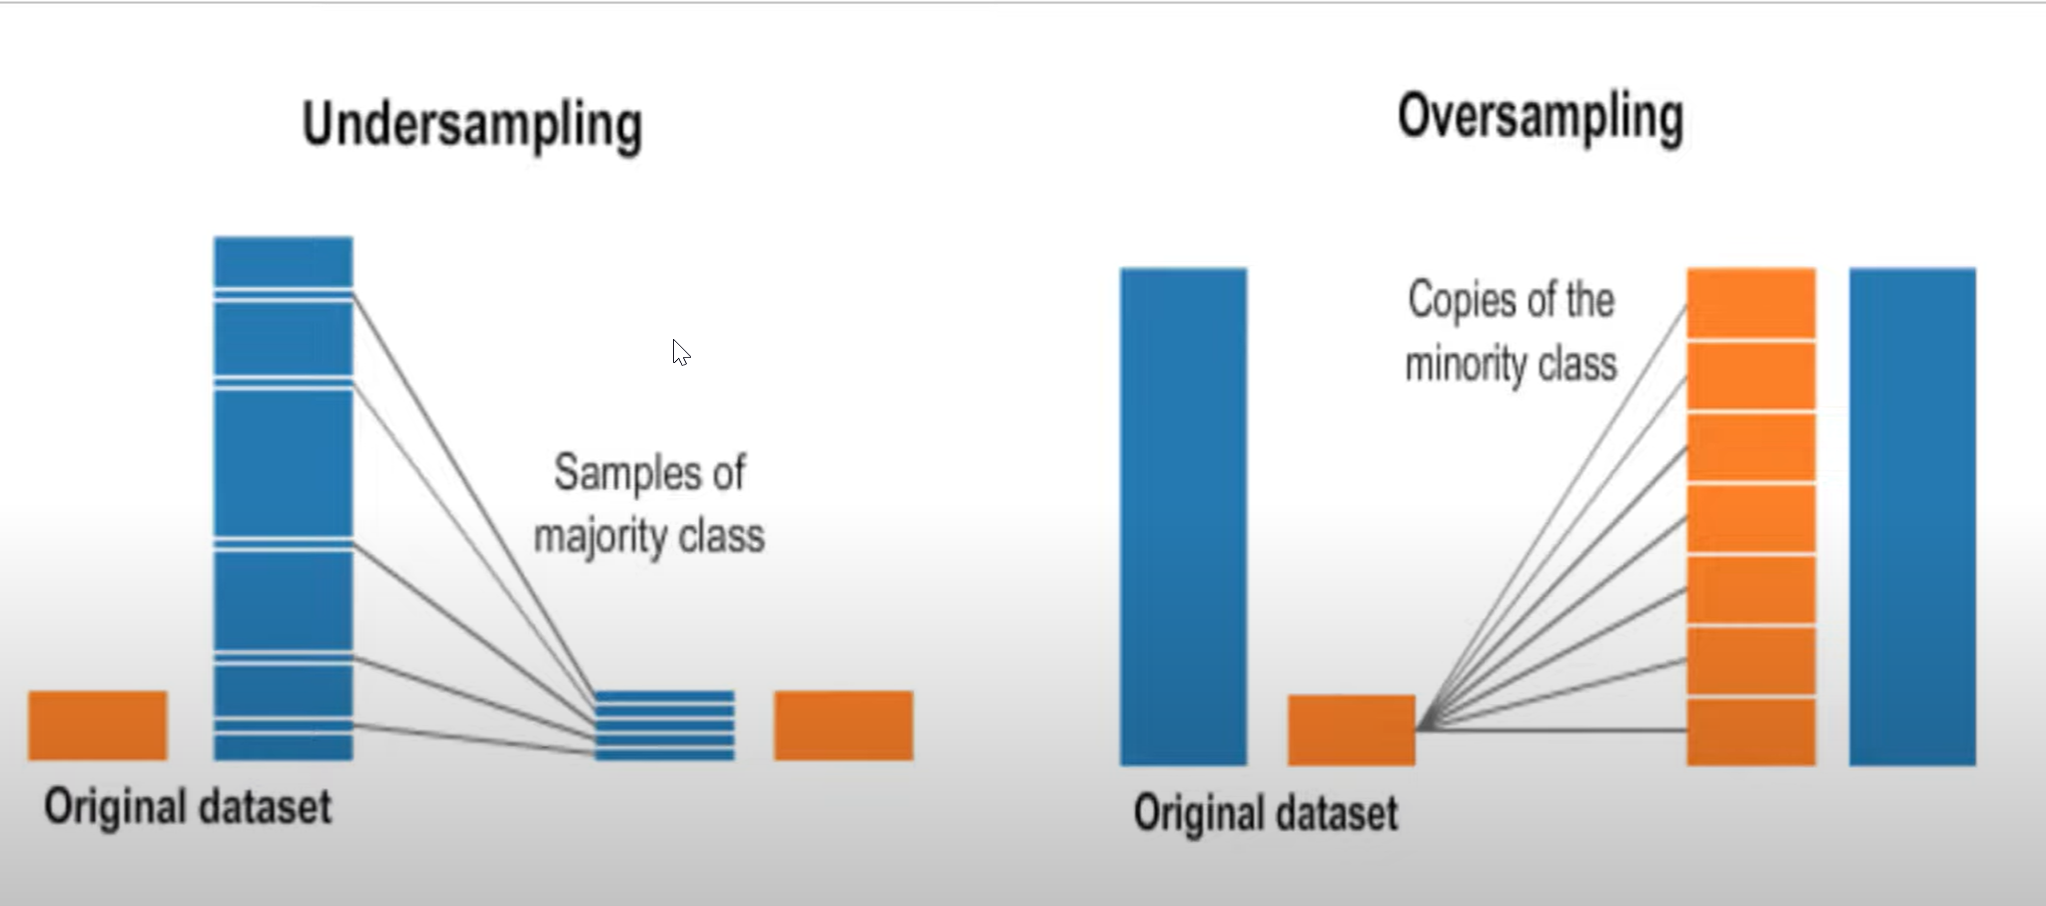

In [ ]:
Image(filename='oversamp.png')

In [ ]:
# ПРИМЕРНАЯ РЕАЛИЗАЦИЯ(образец), НЕ ЗАПУСКАТЬ!
# Примерная реализация в Python
desired_ratio = 2  # Желаемое соотношение классов (1:2)

# Определение количества образцов в минорном и мажорном классах
minor_class_count = len(minor_class_samples)
major_class_count = len(major_class_samples)

# Определение, сколько дополнительных образцов необходимо скопировать в минорном классе
additional_minor_samples = major_class_count * (desired_ratio - 1) - minor_class_count

# Копирование дополнительных образцов для достижения желаемого соотношения
for i in range(additional_minor_samples):
    # Выбор случайного образца из минорного класса и его копирование
    random_minor_sample = random.choice(minor_class_samples)
    minor_class_samples.append(random_minor_sample)

**sampling_strategy:** Определяет стратегию выбора образцов для увеличения.

**Значения:**

- `'auto'`: Увеличивает количество образцов минорного класса до числа образцов мажорного класса (по умолчанию).
- `'minority'`: Увеличивает количество образцов минорного класса до числа образцов мажорного класса.
- `float`: Указывает желаемое отношение между числом образцов минорного и мажорного классов после применения метода.
- `dict`: Позволяет явно указать количество образцов для каждого класса.

**Примеры использования:**

*Указание float для увеличения минорного класса до заданного отношения*

```python
oversample = RandomOverSampler(sampling_strategy=0.5)y_dict)
)State.

In [ ]:
# ПРИМЕРНАЯ РЕАЛИЗАЦИЯ, НЕ ЗАПУСКАТЬ!
sampling_strategy_dict = {'class_0': 1000, 'class_1': 1500, 'class_2': 2000}
oversample = RandomOverSampler(sampling_strategy=sampling_strategy_dict)

In [18]:


print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

oversample = RandomOverSampler(random_state=42,sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train_sc, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over==0)))

Before OverSampling, counts of label '1': 502
Before OverSampling, counts of label '0': 27187 

After OverSampling, the shape of train_X: (54374, 16)
After OverSampling, the shape of train_y: (54374,) 

After OverSampling, counts of label '1': 27187
After OverSampling, counts of label '0': 27187


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('Before and after RandomOversampling')
sns.countplot(ax=ax[0], x=y_train, palette=["#bff2d9", "#fc4c84"])
ax[0].set_title("before")

sns.countplot(ax=ax[1], x=y_train_over, palette=["#bff2d9", "#fc4c84"])
ax[1].set_title('after')

fig.show()

## Random Undersampling

Random Undersampling - это метод уменьшения числа образцов мажорного класса путем случайного удаления его элементов до тех пор, пока все классы не станут сбалансированными или пока желаемое соотношение классов не будет достигнуто.
Учитывая, что точки удаляются случайным образом, невозможно обнаружить или сохранить хорошие или более информативные примеры из класса большинства.


 книга: brownlee_jason_imbalanced_classification_with_python_better  стр 117 ....


`RandomUnderSampler()` принимает следующие параметры:

- `sampling_strategy`: Определяет стратегию уменьшения образцов мажорного класса. Значения:
    - `'auto'`: Уменьшает количество образцов мажорного класса до числа образцов минорного класса (по умолчанию)
    - `'majority'`: Уменьшает количество образцов мажорного класса до числа образцов минорного класса
    - float: Указывает желаемое отношение между числом образцов мажорного и минорного классов после применения метода
    - dict: Позволяет явно указать количество образцов для каждого класса

- `random_state`: Устанавливает начальное состояние для случайной генерации. Это число или объект `RandomState`

- `replacement`: Определяет, следует ли использовать замену при случайном выборе образцов для удаления. Значение по умолчанию - `False`, что означает, что выбранные образцы будут удалены без замены.з замены.

In [19]:


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train==0)))

rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train_sc, y_train.ravel())

print('After UnderSampling, the shape of train_X: {}'.format(X_train_under.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_under.shape))

print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under==1)))
print("After UnderSampling, counts of label '0': {}".format(sum(y_train_under==0)))

Before UnderSampling, counts of label '1': 502
Before UnderSampling, counts of label '0': 27187 

After UnderSampling, the shape of train_X: (1004, 16)
After UnderSampling, the shape of train_y: (1004,) 

After UnderSampling, counts of label '1': 502
After UnderSampling, counts of label '0': 502


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,8))
fig.suptitle('Before and after RandomUndersampling')
sns.countplot(ax=ax[0], x=y_train, palette=["#bff2d9", "#fc4c84"])
ax[0].set_title("before")

sns.countplot(ax=ax[1], x=y_train_under, palette=["#bff2d9", "#fc4c84"])
ax[1].set_title('after')

fig.show()

## Ансамблевые методы в машинном обучении - это методы, которые объединяют несколько моделей для решения задачи. Они строят не одну, а несколько моделей и объединяют их результаты для получения более точных и стабильных предсказаний или классификаций.

Методы бэггинга (bagging) используют множество случайных подмножеств обучающих данных для обучения разных моделей и затем усредняют их предсказания.

1. **Random Forest** - это метод бэггинга (bagging), который основан на использовании ансамбля решающих деревьев. При Random Forest создается множество решающих деревьев, каждое из которых обучается на случайном подмножестве данных и признаков, после чего результаты этих деревьев усредняются для получения окончательного предсказания.

Благодаря случайному выбору подмножества данных и признаков при построении каждого дерева, Random Forest обеспечивает разнообразие моделей и уменьшает переобучение, делая его эффективным методом для работы с широким спектром задач обучения с учителем.

2. **Bagged Decision Trees:** Это базовый метод бэггинга, где используются решающие деревья. Каждое дерево обучается на различном подмножестве данных (путем выбора с повторениями) и затем усредняет свои предсказания.

3. **Bagged SVM** (Support Vector Machines): Использование бэггинга с SVM. Каждая модель SVM обучается на случайном подмножестве данных, после чего их результаты усредняются.

4. **Bagged Neural Networks:** Бэггинг применительно к нейронным сетям. Каждая нейронная сеть обучается на своем подмножестве данных, а затем их результаты комбинируются.

5. **Bagged k-Nearest Neighbors (k-NN):** Применение бэггинга к методу k-NN. Каждая модель k-NN обучается на случайном подмножестве данных и затем их предсказания объединяются.

Бустинг (boosting) строит последовательность моделей, каждая из которых исправляет ошибки предыдущей, улучшая общую производительность.
1. **CatBoost:** Это градиентный бустинговый алгоритм, специально оптимизированный для работы с категориальными признаками. Он автоматически обрабатывает категориальные данные и может достигать высокой производительности без особых предварительных настроек.

2. **XGBoost:** Экстремальный градиентный бустинг (XGBoost) — это алгоритм градиентного бустинга, который обладает высокой производительностью и эффективностью. Он часто используется в соревнованиях по машинному обучению и широко применяется в практике из-за своей точности.

3. **AdaBoost:** Этот метод использует адаптивное взвешивание (Adaptive Boosting) для обучения последовательности слабых моделей (например, деревьев решений) с фокусом на улучшении ошибок предыдущих моделей.

4. **Gradient Boosting Machines (GBM):** Это общее название для алгоритмов, которые пошагово строят ансамбль слабых моделей (обычно деревьев решений) и корректируют их ошибки, фокусируясь на тех примерах, на которых предыдущие модели ошиблись.

5. **LightGBM:** Это еще один градиентный бустинговый алгоритм, который обеспечивает высокую скорость работы за счет оптимизации структуры деревьев и эффективной обработки больших объемов данных.
назаний.еревьям.

## CrossValidation

**Кросс-валидация** — это методика обучения и оценки модели, которая разбивает данные на несколько секций и обучает несколько алгоритмов на этих секциях. Этот метод повышает надежность модели, удерживая данные вне процесса обучения. Кроме повышения производительности на многих неучитываемых наблюдениях, в средах с ограниченными данными он может быть эффективным инструментом для обучения моделей с меньшим набором данных.

Таким образом, при cv=5 процесс обучения и оценки модели повторяется 5 раз с разными подгруппами данных для тестирования, и результаты усредняются, чтобы получить окончательную оценку производительности модели.

Разбиваем общий training на 5 частей (условно в данном примере) на 4 папках(частях) содель обучается, и на одной(validation) тестирование (прогнозирование) модели. В следующих эксперементах validation смещается. Затем вычисляется средняя оценка модели.

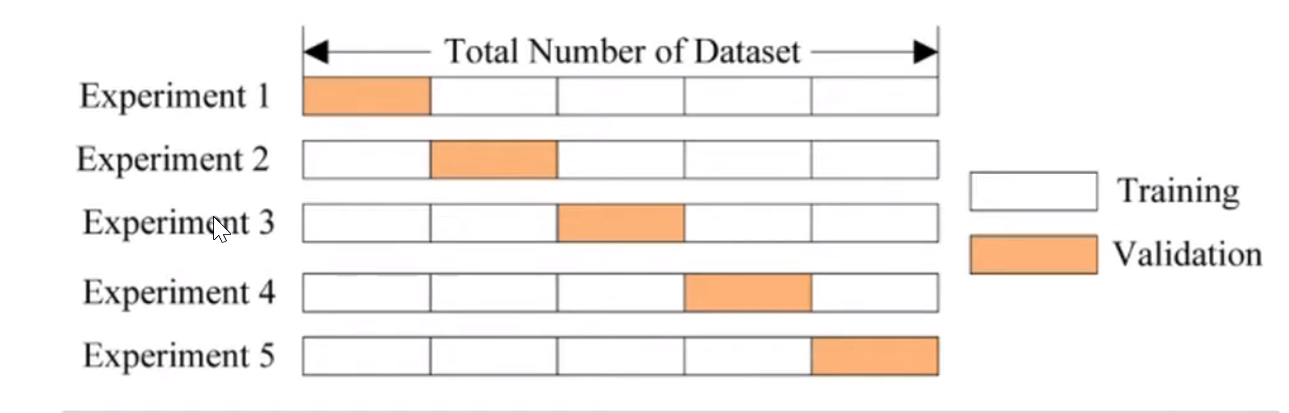

In [33]:
Image(filename='crossval.png')

Этот код представляет собой сравнение производительности нескольких классификаторов машинного обучения на основе метрик оценки, таких как точность (precision), полнота (recall), F1-мера и время обучения/предсказания.

Создается список моделей list_of_models, который содержит объекты классификаторов, таких как CatBoostClassifier, AdaBoostClassifier, и другие.

list_of_model_names содержит имена каждой модели в списке list_of_models.

**cv_results** - это DataFrame, используемый для хранения результатов оценки каждой модели по метрикам и времени обучения/предсказания.

**scoring** определяет используемые метрики для оценки моделей.

Для каждой модели из list_of_models выполняется кросс-валидация с использованием cross_validate, используя метрики из scoring. Результаты оценки (средние значения) помещаются в cv_results для каждой модели.

Наконец, выводятся результаты в виде DataFrame cv_results, показывая средние значения метрик для каждой модели.

Этот код полезен для сравнения производительности различных моделей машинного обучения на конкретном наборе данных. Он поможет определить, какая модель лучше всего подходит для конкретной задачи, основываясь на выбранных ме

data=0.0 предполагает передачу единственного значения для заполнения всего DataFrame, но это значение (в данном случае 0.0) не используется в качестве заполнителя для всех ячеек. index=list_of_model_names задает индексы DataFrame. Имена моделей из list_of_model_names используются в качестве индексов. columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'] определяет названия столбцов DataFrame. Эти столбцы будут содержать время обучения (fit_time), время предсказания (score_time) и метрики оценки (точность accuracy, точность precision, полнота recall, F1-мера f1). Таким образом, cv_results создается как пустой DataFrame с индексами, соответствующими именам моделей, и столбцами для хранения метрик и времени выполнения для каждой модели. В процессе выполнения кода эти ячейки будут заполнены средними значениями результатов оценки для каждой модели.триках оценки.

# SMOTE

In [53]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [31]:

list_of_models = [
        CatBoostClassifier(),#boosting
        AdaBoostClassifier(),#boosting
        XGBClassifier(),#boosting
        LGBMClassifier(),#boosting
        GradientBoostingClassifier()] #boosting

#Эта строка создает список имен моделей в list_of_models.
#Для каждой модели x в list_of_models она использует функцию type(x).__name__, которая возвращает строковое имя класса объекта.
#Например, если модель - CatBoostClassifier(), type(x).__name__ вернет строку 'CatBoostClassifier'.
list_of_model_names = [type(x).__name__ for x in list_of_models]

cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_smote,
        y=y_train_smote,
        scoring=scoring,
        cv=10,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
CatBoostClassifier,48.336379,0.104385,0.989371,0.990827,0.989371,0.989290
AdaBoostClassifier,3.960944,0.087742,0.818921,0.823043,0.818921,0.818347
XGBClassifier,1.282275,0.036756,0.979550,0.980987,0.979550,0.979475
LGBMClassifier,1.607771,0.083500,0.986428,0.987973,0.986428,0.986342
GradientBoostingClassifier,14.320831,0.027110,0.922188,0.923623,0.922188,0.922117


**fit_time и score_time** отражают время, затраченное на обучение модели и время, затраченное на оценку каждой модели на каждой итерации кросс-валидации соответственно.







In [54]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [56]:
# List of base classifiers
base_classifiers = [
    RandomForestClassifier(),
    #SVC(),
    ExtraTreesClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

# List of model names
list_of_model_names = [type(x).__name__ for x in base_classifiers]

# DataFrame to store results
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']
)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Loop through each base classifier, perform cross-validation, and store results in the DataFrame
for model, model_name in zip(base_classifiers, list_of_model_names):
    bagging = BaggingClassifier(base_estimator=model)
    cv_result = cross_validate(
        estimator=bagging,
        X=X_train_smote,
        y=y_train_smote,
        scoring=scoring,
        cv=10,
        n_jobs=-1
    )

    cv_results.loc[model_name] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
RandomForestClassifier,52.111143,0.326278,NaN,NaN,NaN,NaN
ExtraTreesClassifier,13.477596,0.096547,NaN,NaN,NaN,NaN
DecisionTreeClassifier,3.671822,0.017601,0.984607,0.985589,0.984607,0.984563
KNeighborsClassifier,0.134944,18.794712,0.930923,0.936562,0.930923,0.930698


**EnsembleVoteClassifier** из библиотеки mlxtend - это классификатор, который объединяет несколько классификаторов (моделей) для получения более устойчивых и точных предсказаний. Он использует голосование большинства или взвешенное голосование для принятия решения на основе предсказаний отдельных моделей.

Этот классификатор принимает на вход список моделей (классификаторов) и использует их для генерации предсказаний. В случае бинарной классификации для каждого объекта он возвращает прогноз, основанный на большинстве голосов от всех включенных моделей.

Если требуется, EnsembleVoteClassifier может использовать веса для моделей в процессе голосования, чтобы предоставить больший вес более уверенным моделям или уменьшить влияние менее точных моделей.

In [32]:
!pip install mlxtend

Fit Time: 14.0657300949 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6787
           1       0.12      0.01      0.03       136

    accuracy                           0.98      6923
   macro avg       0.55      0.51      0.51      6923
weighted avg       0.96      0.98      0.97      6923

Confusion Matrix:
[[6772   15]
 [ 134    2]]


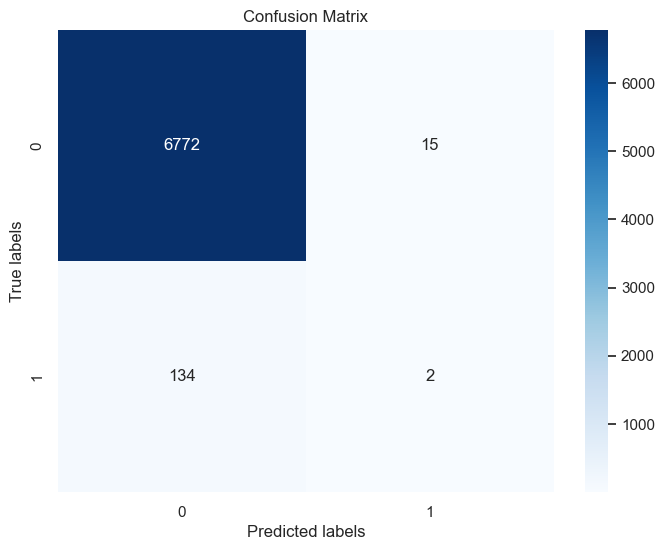

In [29]:
 #Создание базовых моделей
model1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model2 = AdaBoostClassifier(n_estimators=100, random_state=42)
model3 = XGBClassifier(n_estimators=100, random_state=42)
model4 = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
model5 = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

# Создание объекта EnsembleVoteClassifier
ensemble = EnsembleVoteClassifier(clfs=[model1, model2, model3, model4, model5])
# Start measuring time
start_time = time.time()
# Обучение модели ансамбля
ensemble.fit(X_train_smote, y_train_smote)

# Calculate the fit time
fit_time = time.time() - start_time

print(f"Fit Time: {fit_time:.10f} seconds")

# Предсказание на тестовой выборке
y_pred = ensemble.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

***ОЦЕНКА МОДЕЛИ ИСПОЛЬЗУЯ AUC-ROC SCORE***

In [27]:
# Получение предсказанных вероятностей для каждого класса
y_ens =ensemble.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_ens_class_1 = y_ens[:, 1]


In [28]:
# Расчет AUC-ROC
auc = roc_auc_score(y_test,y_ens_class_1)
print(f"AUC-ROC_1: {auc}")

AUC-ROC_1: 0.830923521611385


In [38]:
cou = Counter(y_test)
cou

Counter({0: 6787, 1: 136})

In [35]:
len(X_test_sc)

6923

In [36]:
len(y_test)

6923

**0 класс (не инсультники)**

Presision = 6772/6772+134 = TP/TP+FP = 0.98

Recall = 6772/6772+15=TP/TP+FN = 0.9979 ~1.00

**1 класс (инсультники)**

Presision = 2/2+15 = TP/TP+FP = 0.12

Recall = 2/2+134=TP/TP+FN = 0.01

Fit Time: 231.6633729935 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6787
           1       0.04      0.08      0.06       136

    accuracy                           0.95      6923
   macro avg       0.51      0.52      0.51      6923
weighted avg       0.96      0.95      0.95      6923

Confusion Matrix:
[[6545  242]
 [ 125   11]]


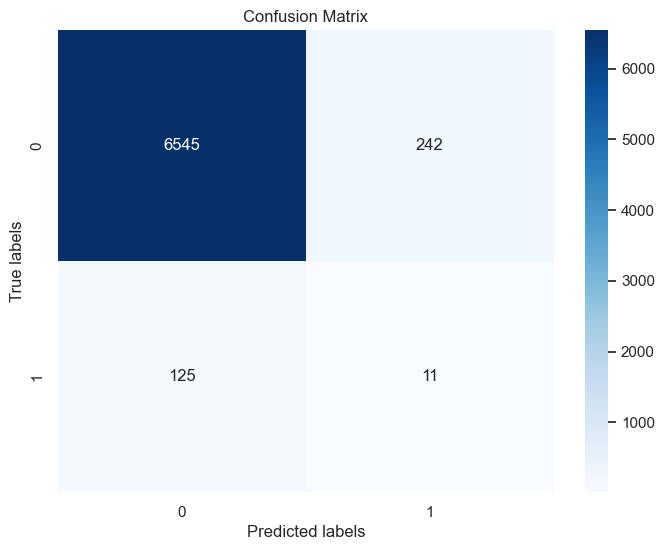

In [36]:
# Create base models
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2 = SVC(probability=True)
model_3 = DecisionTreeClassifier(random_state=42)
model_4 = KNeighborsClassifier()

# Create an ensemble using VotingClassifier
ensemble_1 = EnsembleVoteClassifier(clfs=[model_1,model_2,model_3,model_4],voting='hard')  # 'hard' voting combines predictions by majority voting
# Start measuring time
start_time = time.time()
# Train the ensemble
ensemble_1.fit(X_train_smote, y_train_smote)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


# Predict on the test set
y_pred = ensemble_1.predict(X_test_sc)

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
# Получение предсказанных вероятностей для каждого класса
y_ens_1 =ensemble_1.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_ens_1_class_1 = y_ens_1[:, 1]



In [38]:

# Расчет AUC-ROC
auc = roc_auc_score(y_test,y_ens_class_1)
print(f"AUC-ROC_1: {auc}")


AUC-ROC_1: 0.830923521611385


**0 класс**

Presision = 6538/6538+126 = TP/TP+FP = 0.98

Recall = 6538/6538+249=TP/TP+FN = 0.96

**1 класс**

Presision = 10/10+249 = TP/TP+FP = 0.04

Recall = 10/10+126=TP/TP+FN = 0.07


**Macro Average (макро-среднее)**: Это среднее значение, которое вычисляется путем усреднения метрик (точность, полнота, F1-мера и т.д.), рассчитанных независимо для каждого класса, без учета дисбаланса классов. Каждый класс вносит равный вклад в итоговое среднее значение, независимо от количества его экземпляров (support).
**
Weighted Avera**ge (взвешенное среднее): Это среднее значение, рассчитанное путем усреднения метрик с учетом весов, которые определяются количеством экземпляров в каждом классе (support). Таким образом, классы с большим количеством экземпляров имеют более значимое влияние на итоговую метрику, чем классы с меньшим числом экземпляров. Это позволяет лучше учесть дисбаланс классов при оценке производительности модели по нескольким класса


**Macro Average (макро-среднее):**

Precision (точность): 0.51  
Recall (полнота): 0.52  
F1-score: 0.51  

Это означает, что если взять среднее значение precision, recall и F1-score по всем классам (вне зависимости от их размера или поддержки), то они будут равны указанным числам (в данном случае, около 0.51-0.52).

**Weighted Average (взвешенное среднее):**

Precision (точность): 0.96  
Recall (полнота): 0.95  
F1-score: 0.95  

Эти значения представляют взвешенное среднее, где каждый класс вносит вклад в соответствии с его размером (количеством экземпляров). Это означает, что модель имеет очень высокие показатели точности, полноты и F1-меры для средневзвешенных результатов.

Итак, модель имеет относительно низкие значения макро-среднего (учитывая все классы равноправно) и высокие значения взвешенного среднего (учитывая размеры классов) по precision, recall и F1-score на данном наборе данных.м.

# Random Oversampling

In [ ]:

list_of_models = [
        CatBoostClassifier(),#boosting
        AdaBoostClassifier(),#boosting
        XGBClassifier(),#boosting
        LGBMClassifier(),#boosting
        GradientBoostingClassifier()] #boosting

#Эта строка создает список имен моделей в list_of_models.
#Для каждой модели x в list_of_models она использует функцию type(x).__name__, которая возвращает строковое имя класса объекта.
#Например, если модель - CatBoostClassifier(), type(x).__name__ вернет строку 'CatBoostClassifier'.
list_of_model_names = [type(x).__name__ for x in list_of_models]

cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_over,
        y=y_train_over,
        scoring=scoring,
        cv=10,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
CatBoostClassifier,38.001852,0.042675,0.973443,0.974787,0.973443,0.973424
AdaBoostClassifier,2.211498,0.040401,0.780134,0.783522,0.780134,0.779474
XGBClassifier,0.490504,0.017300,0.967632,0.969609,0.967632,0.967597
LGBMClassifier,0.924210,0.016300,0.927557,0.935823,0.927557,0.927210
GradientBoostingClassifier,4.954511,0.014398,0.813587,0.818525,0.813587,0.812863


In [ ]:
# List of base classifiers
base_classifiers = [
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

# List of model names
list_of_model_names = [type(x).__name__ for x in base_classifiers]

# DataFrame to store results
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']
)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Loop through each base classifier, perform cross-validation, and store results in the DataFrame
for model, model_name in zip(base_classifiers, list_of_model_names):
    bagging = BaggingClassifier(base_estimator=model)
    cv_result = cross_validate(
        estimator=bagging,
        X=X_train_over,
        y=y_train_over,
        scoring=scoring,
        cv=10,
        n_jobs=-1
    )

    cv_results.loc[model_name] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
RandomForestClassifier,23.664401,0.920801,0.996414,0.996440,0.996414,0.996414
SVC,364.045718,81.001996,0.837349,0.842581,0.837349,0.836726
DecisionTreeClassifier,0.964200,0.019902,0.997057,0.997075,0.997057,0.997057
KNeighborsClassifier,0.194101,24.665616,0.971494,0.973039,0.971494,0.971470


***In scikit-learn's SVC (Support Vector Classifier),*** the predict_proba method is only available if the ***probability parameter is set to True*** when the model is created. ***By default, this parameter is set to False.*** When you set probability=True, it enables probability estimates, but it also slows down training, as it internally uses cross-validation to calibrate the probabilities.

Fit Time: 270.2329320908 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6787
           1       0.05      0.01      0.02       136

    accuracy                           0.97      6923
   macro avg       0.51      0.50      0.50      6923
weighted avg       0.96      0.97      0.97      6923

Confusion Matrix:
[[6746   41]
 [ 134    2]]


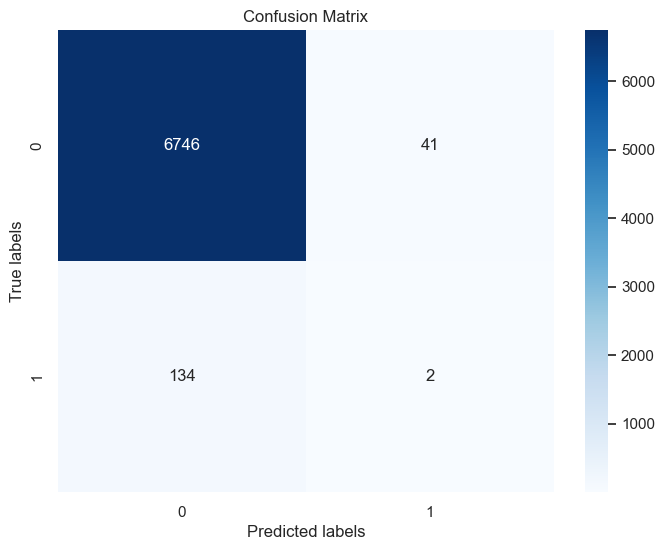

In [39]:
# Create base models
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2 = SVC(probability=True)
model_3 = DecisionTreeClassifier(random_state=42)
model_4 = KNeighborsClassifier()

# Create an ensemble using VotingClassifier
ensemble_2 = EnsembleVoteClassifier(clfs=[model_1,model_2,model_3,model_4],voting='hard')  # 'hard' voting combines predictions by majority voting
# Start measuring time
start_time = time.time()

# Train the ensemble
ensemble_2.fit(X_train_over, y_train_over)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


# Predict on the test set
y_pred = ensemble_2.predict(X_test_sc)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
print(conf_matrix)
# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Получение предсказанных вероятностей для каждого класса
y_ens_2 =ensemble_2.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_ens_2_class_1 = y_ens_2[:, 1]


In [41]:
# Расчет AUC-ROC
auc = roc_auc_score(y_test,y_ens_2_class_1)
print(f"AUC-ROC_1: {auc}")


AUC-ROC_1: 0.806302490054516


Fit Time: 5.8012692928 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6787
           1       0.07      0.61      0.13       136

    accuracy                           0.84      6923
   macro avg       0.53      0.72      0.52      6923
weighted avg       0.97      0.84      0.89      6923

Confusion Matrix:
[[5699 1088]
 [  53   83]]


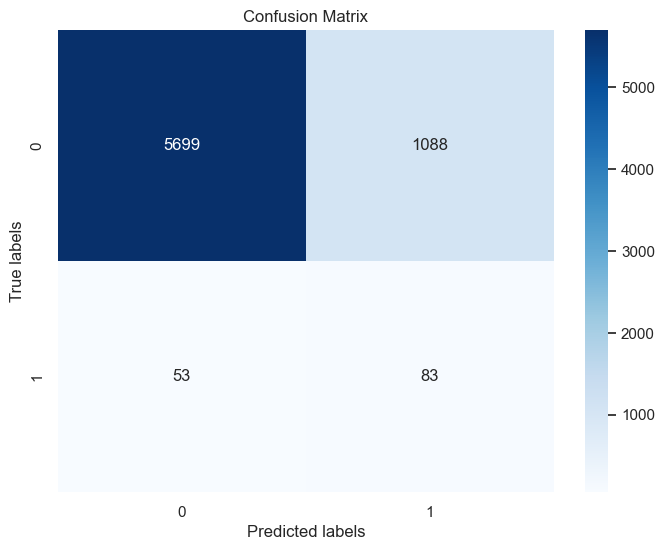

In [42]:
 #Создание базовых моделей
model1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model2 = AdaBoostClassifier(n_estimators=100, random_state=42)
model3 = XGBClassifier(n_estimators=100, random_state=42)
model4 = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
model5 = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

# Создание объекта EnsembleVoteClassifier
ensemble_3 = EnsembleVoteClassifier(clfs=[model1, model2, model3, model4, model5])

# Start measuring time
start_time = time.time()

# Обучение модели ансамбля
ensemble_3.fit(X_train_over, y_train_over)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


# Предсказание на тестовой выборке
y_pred = ensemble_3.predict(X_test_sc)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
print(conf_matrix)
# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [43]:
# Получение предсказанных вероятностей для каждого класса
y_ens_3 =ensemble_3.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_ens_3_class_1 = y_ens_3[:, 1]

# Расчет AUC-ROC
auc = roc_auc_score(y_test,y_ens_3_class_1)
print(f"AUC-ROC_1: {auc}")


AUC-ROC_1: 0.8265585591832136


# Random Undersampling

In [ ]:
list_of_models = [
        CatBoostClassifier(),#boosting
        AdaBoostClassifier(),#boosting
        XGBClassifier(),#boosting
        LGBMClassifier(),#boosting
        GradientBoostingClassifier()] #boosting

#Эта строка создает список имен моделей в list_of_models.
#Для каждой модели x в list_of_models она использует функцию type(x).__name__, которая возвращает строковое имя класса объекта.
#Например, если модель - CatBoostClassifier(), type(x).__name__ вернет строку 'CatBoostClassifier'.
list_of_model_names = [type(x).__name__ for x in list_of_models]

cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_under,
        y=y_train_under,
        scoring=scoring,
        cv=10,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
CatBoostClassifier,4.279443,0.008701,0.769901,0.777739,0.769745,0.768005
AdaBoostClassifier,0.091602,0.011600,0.740941,0.748827,0.740804,0.738507
XGBClassifier,0.172833,0.005000,0.734079,0.737689,0.733941,0.732914
LGBMClassifier,0.629500,0.006501,0.758950,0.763315,0.758843,0.757883
GradientBoostingClassifier,0.186103,0.004698,0.748970,0.756885,0.748804,0.746813


In [ ]:
# List of base classifiers
base_classifiers = [
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

# List of model names
list_of_model_names = [type(x).__name__ for x in base_classifiers]

# DataFrame to store results
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']
)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Loop through each base classifier, perform cross-validation, and store results in the DataFrame
for model, model_name in zip(base_classifiers, list_of_model_names):
    bagging = BaggingClassifier(base_estimator=model)
    cv_result = cross_validate(
        estimator=bagging,
        X=X_train_under,
        y=y_train_under,
        scoring=scoring,
        cv=10,
        n_jobs=-1
    )

    cv_results.loc[model_name] = list(map(np.mean, cv_result.values()))

cv_results

,fit_time,score_time,accuracy,precision,recall,f1
RandomForestClassifier,1.992305,0.072500,0.772871,0.780865,0.772706,0.770889
SVC,0.114996,0.039606,0.766911,0.772646,0.766765,0.765536
DecisionTreeClassifier,0.045886,0.006421,0.734030,0.736487,0.733863,0.733037
KNeighborsClassifier,0.009271,0.205299,0.720050,0.723580,0.719882,0.718890


# EnsembleVoteClassifier

Fit Time: 0.2698919773 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      6787
           1       0.05      0.77      0.10       136

    accuracy                           0.73      6923
   macro avg       0.52      0.75      0.47      6923
weighted avg       0.98      0.73      0.83      6923

Confusion Matrix:
[[4950 1837]
 [  31  105]]


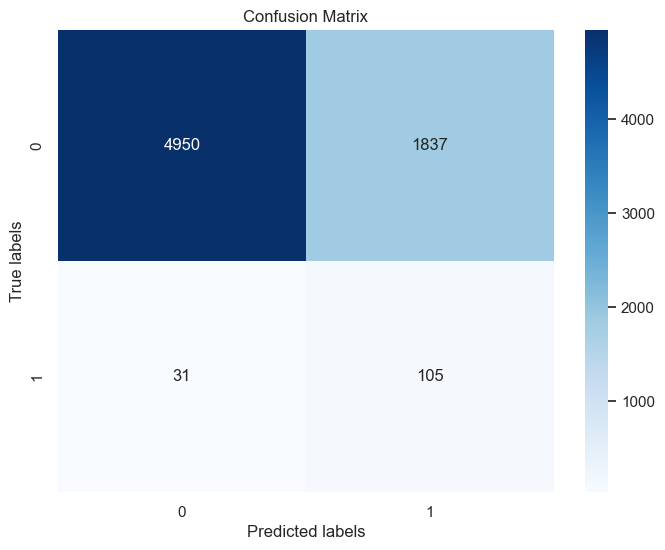

In [44]:
# Create base models
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2 = SVC(probability=True)
model_3 = DecisionTreeClassifier(random_state=42)
model_4 = KNeighborsClassifier()

# Create an ensemble using VotingClassifier
ensemble_4 = EnsembleVoteClassifier(clfs=[model_1,model_2,model_3,model_4],voting='hard')  # 'hard' voting combines predictions by majority voting

# Start measuring time
start_time = time.time()

# Train the ensemble
ensemble_4.fit(X_train_under, y_train_under)

# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


# Predict on the test set
y_pred = ensemble_4.predict(X_test_sc)
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
print(conf_matrix)
# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [45]:
# Получение предсказанных вероятностей для каждого класса
y_ens_4 =ensemble_4.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_ens_4_class_1 = y_ens_4[:, 1]

# Расчет AUC-ROC
auc = roc_auc_score(y_test,y_ens_4_class_1)
print(f"AUC-ROC_1: {auc}")


AUC-ROC_1: 0.805196352889174


## EnsembleVoteClassifier

Fit Time: 0.4545173645 seconds
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      6787
           1       0.05      0.85      0.10       136

    accuracy                           0.70      6923
   macro avg       0.52      0.77      0.46      6923
weighted avg       0.98      0.70      0.81      6923

Confusion Matrix:
[[4733 2054]
 [  21  115]]


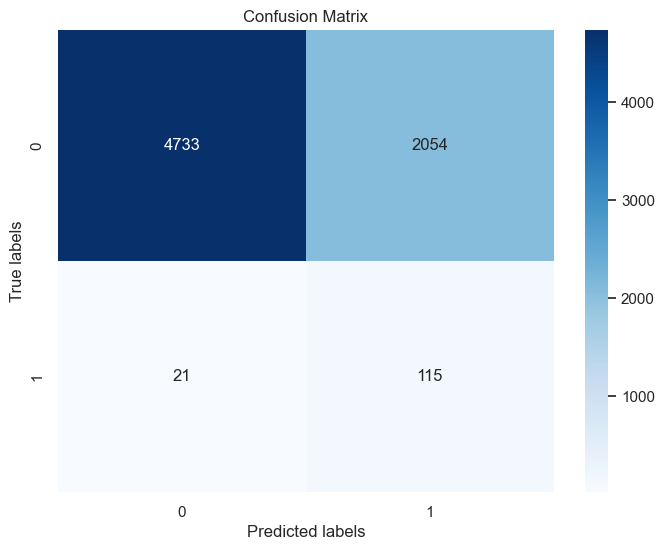

In [46]:
 #Создание базовых моделей
model1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model2 = AdaBoostClassifier(n_estimators=100, random_state=42)
model3 = XGBClassifier(n_estimators=100, random_state=42)
model4 = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
model5 = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

# Создание объекта EnsembleVoteClassifier
ensemble_5 = EnsembleVoteClassifier(clfs=[model1, model2, model3, model4, model5])

# Start measuring time
start_time = time.time()
# Обучение модели ансамбля
ensemble_5.fit(X_train_under, y_train_under)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


# Предсказание на тестовой выборке
y_pred = ensemble_5.predict(X_test_sc)

## Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
print(conf_matrix)
# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Получение предсказанных вероятностей для каждого класса
y_ens_5 =ensemble_5.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_ens_5_class_1 = y_ens[:, 1]

# Расчет AUC-ROC
auc = roc_auc_score(y_test,y_ens_5_class_1)
print(f"AUC-ROC_1: {auc}")


AUC-ROC_1: 0.830923521611385
